In [4]:
import numpy as np
import pandas as pd
import arviz as az
from matplotlib import pyplot as plt
import os

prefix = 'so1'
iData = az.from_netcdf(f'../results/{prefix}_result.nc')

In [5]:
summary_fname = f"../results/{prefix}_summary.csv"
if os.path.isfile(summary_fname):
    summary = pd.read_csv(summary_fname)
else:
    summary = az.summary(iData)
    summary.to_csv(summary_fname)

summary.rename(columns={'Unnamed: 0': 'Name'}, inplace=True)

Text(0.5, 1.0, 'Results for so1')

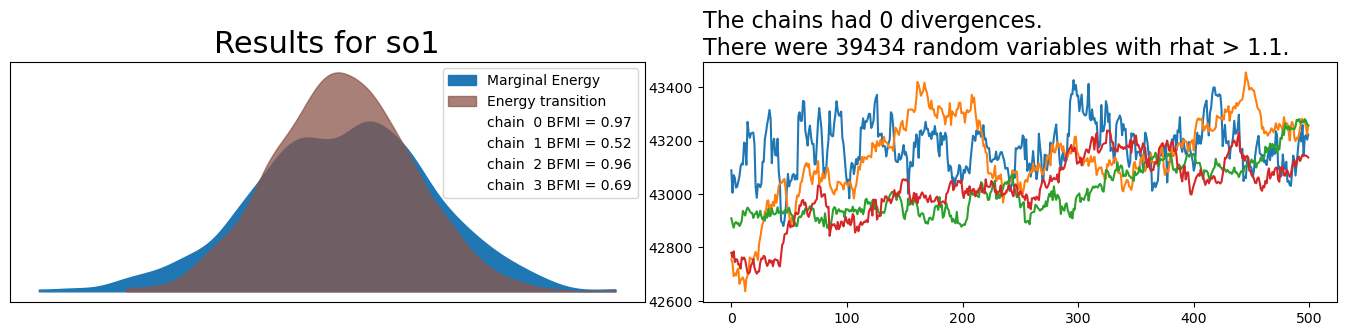

In [6]:
cnt = 0
names = []
for it in summary.Name[np.argwhere(summary['r_hat'].values > 1.1).flatten()]:
    names.append(it)
    cnt += 1

lp = np.array(iData.sample_stats['lp'])
n_chains = lp.shape[0]

fig, axs = plt.subplots(1, 2, figsize=(14, 3))
fig.tight_layout()
az.plot_energy(iData, ax=axs[0])
for chain in range(n_chains):
    axs[1].plot(np.arange(lp.shape[1]), lp[chain], color=f"C{chain}")
axs[1].text(
    0,
    1.03,
    f"The chains had {np.sum(np.array(iData.sample_stats['diverging']))} divergences." + "\n" + f"There were {cnt} random variables with rhat > 1.1.",
    transform=axs[1].transAxes,
    size=16,
)
axs[0].set_title(f"Results for {prefix}", fontsize=22)

In [1]:
import numpy as np
import pandas as pd
import arviz as az
from matplotlib import pyplot as plt
import os

core_ids = [
    "ODP-1089",
    "VIC",
    "MD06-3040",
    "Be7",
    "QH17A",
    "NuurSKN",
    "U1305",
    "TTN-057-21-PC02",
    "BIW95-4",
    "BOB24",
    "C087",
    "lm12-13-14-15",
    "GGC9",
    "C142a",
    "SWERUS-2-PC1",
    "V95-7",
    "HML",
    "NWA",
    "PT-06",
    "FUR",
    "CHU",
    "KEI",
    "PT-04",
    "305A5",
    "GGC25",
    "BOB88",
    "QH4",
]

for core_id in core_ids:
    iData = az.from_netcdf(f'../results/{core_id}_result.nc')
    summary_fname = f"../results/{core_id}_summary.csv"
    if os.path.isfile(summary_fname):
        summary = pd.read_csv(summary_fname)
    else:
        summary = az.summary(iData)
        summary.to_csv(summary_fname)

    summary.rename(columns={'Unnamed: 0': 'Name'}, inplace=True)

    cnt = 0
    names = []
    for it in summary.Name[np.argwhere(summary['r_hat'].values > 1.1).flatten()]:
        names.append(it)
        cnt += 1

    lp = np.array(iData.sample_stats['lp'])
    n_chains = lp.shape[0]

    fig, axs = plt.subplots(1, 2, figsize=(14, 3))
    fig.tight_layout()
    az.plot_energy(iData, ax=axs[0])
    for chain in range(n_chains):
        axs[1].plot(np.arange(lp.shape[1]), lp[chain], color=f"C{chain}")
    axs[1].text(
        0,
        1.03,
        f"The chains had {np.sum(np.array(iData.sample_stats['diverging']))} divergences." + "\n" + f"There were {cnt} random variables with rhat > 1.1.",
        transform=axs[1].transAxes,
        size=16,
    )
    axs[0].set_title(f"Results for {core_id}", fontsize=22)
    plt.savefig(f'../result_plots/{core_id}_cr.png', bbox_inches="tight")
    plt.close()
# plt.show()

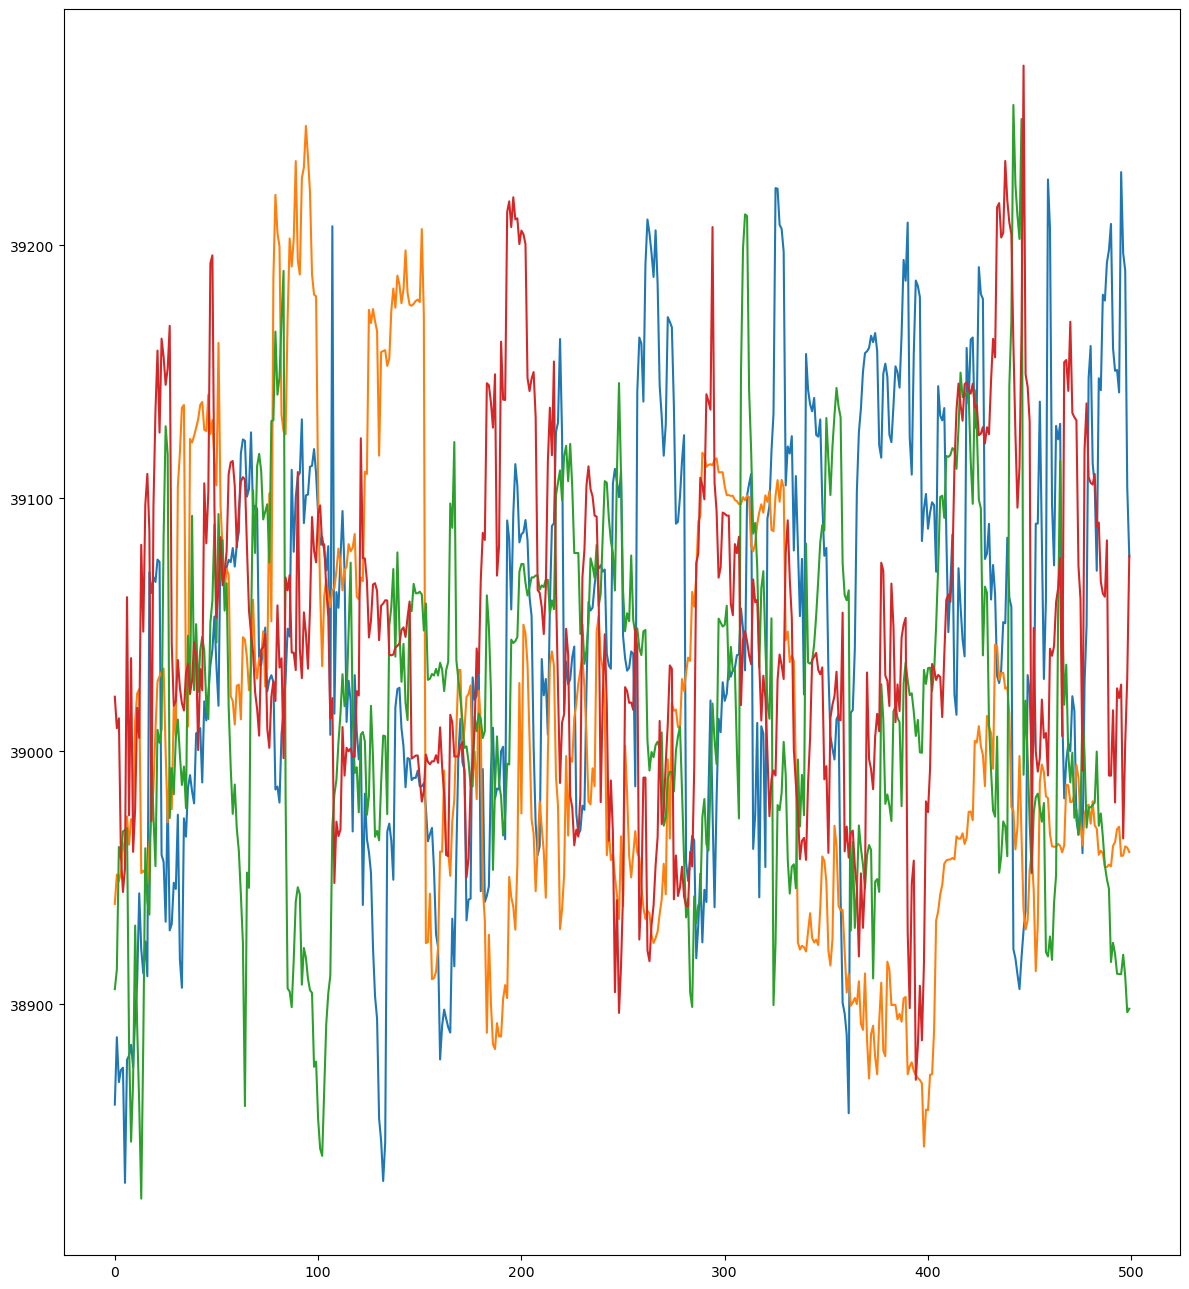

In [6]:
lp = np.array(iData.sample_stats['lp'])
n_chains = lp.shape[0]

fig, ax = plt.subplots(1, 1, figsize=(12, 1+n_chains*3))

for it in range(n_chains):
    ax.plot(
        np.arange(lp.shape[1]),
        lp[it],
    )

fig.tight_layout(w_pad=1.3)